In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
#!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
#!apt-get update -qq 2>&1 > /dev/null
#!apt-get -y install -qq google-drive-ocamlfuse fuse
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [1]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [2]:
import os
import sys
os.chdir("drive/cifar-10-batches-py/")
!ls

batches.meta		   data_batch_5
cnn-tf-cifar10-0.0986.png  drive
cnn-tf-cifar10-0.4964.png  google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
cnn-tf-cifar10-0.4966.png  google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb.1
cnn-tf-cifar10-0.551.png   google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb.2
data_batch_1		   readme.html
data_batch_2		   test_batch
data_batch_3		   wget-log
data_batch_4


In [3]:
#导入数据
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle
import time


def unpickle(filename):
    with open(filename, 'rb') as f:
        d = pickle.load(f, encoding='latin1')
        return d

def onehot(labels):
    '''
    one-hot 编码
    '''
    n_sample = len(labels)
    n_class = max(labels) + 1
    onehot_labels = np.zeros((n_sample, n_class))
    onehot_labels[np.arange(n_sample), labels] = 1
    return onehot_labels

# 训练数据集
data1 = unpickle('data_batch_1')
data2 = unpickle('data_batch_2')
data3 = unpickle('data_batch_3')
data4 = unpickle('data_batch_4')
data5 = unpickle('data_batch_5')
X_train = np.concatenate((data1['data'], data2['data'], data3['data'], data4['data'], data5['data']), axis=0)
y_train = np.concatenate((data1['labels'], data2['labels'], data3['labels'], data4['labels'], data5['labels']), axis=0)
y_train = onehot(y_train)

# 测试数据集
test = unpickle('test_batch')
X_test = test['data'][:5000, :]
y_test = onehot(test['labels'])[:5000, :]

print('Training dataset shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing dataset shape:', X_test.shape)
print('Testing labels shape:', y_test.shape)

Training dataset shape: (50000, 3072)
Training labels shape: (50000, 10)
Testing dataset shape: (5000, 3072)
Testing labels shape: (5000, 10)


In [0]:
def max_pool(x, name, filter_height = 2, filter_width = 2,
	stride = 2, padding = 'VALID'):

	"""
  池化层
  """

	return tf.nn.max_pool(x, ksize = [1, filter_height, filter_width, 1],
		strides = [1, stride, stride, 1], padding = padding, name = name)


def conv_layer(x, num_filters, name, filter_height = 3, filter_width = 3,
	stride = 1, padding = 'SAME'):

	"""
  卷积层
  """
	
	# 获取input_channels
	input_channels = int(x.get_shape()[-1])

	with tf.variable_scope(name) as scope:

		
		W = tf.get_variable('weights', shape = [filter_height, filter_width, input_channels, num_filters],
			initializer = tf.random_normal_initializer(mean = 0.0, stddev = 0.01))

		b = tf.get_variable('biases', shape = [num_filters], initializer = tf.constant_initializer(0.0))

		
		conv = tf.nn.conv2d(x, W, strides = [1, stride, stride, 1], padding = padding)

    #加入batch_norm
		z = tf.contrib.layers.batch_norm(tf.nn.bias_add(conv, b),decay=0.9, center=True, scale=True, epsilon=1e-3,
                                        is_training=True, updates_collections=None)
    
		a = tf.nn.relu(z)

		return a

def fc_layer(x, input_size, output_size, name, relu = True):

	"""
  全连接层
  """
	
	with tf.variable_scope(name) as scope:

		
		W = tf.get_variable('weights', shape = [input_size, output_size],
			initializer = tf.random_normal_initializer(mean = 0.0, stddev = 0.01))

		b = tf.get_variable('biases', shape = [output_size], initializer = tf.constant_initializer(0.0))

		
		z = tf.contrib.layers.batch_norm(tf.nn.bias_add(tf.matmul(x, W), b),decay=0.9, center=True, scale=True, epsilon=1e-3,
                                        is_training=True, updates_collections=None)

		if relu:
			
			a = tf.nn.relu(z)
			return a

		else:
			return z

def dropout(x, keep_prob):

	"""
  神经元随机失活
  """

	return tf.nn.dropout(x, keep_prob = keep_prob)



epoch = 0, train_acc = 0.4922, time = 61.0657
epoch = 1, train_acc = 0.5391, time = 58.2141
epoch = 2, train_acc = 0.5938, time = 58.2610
epoch = 3, train_acc = 0.5703, time = 58.2388
epoch = 4, train_acc = 0.6250, time = 58.2745
epoch = 5, train_acc = 0.5234, time = 58.2607
epoch = 6, train_acc = 0.6719, time = 58.1365
epoch = 7, train_acc = 0.6562, time = 58.2288
epoch = 8, train_acc = 0.7344, time = 58.2314
epoch = 9, train_acc = 0.6797, time = 58.2430
epoch = 10, train_acc = 0.6797, time = 58.2441
epoch = 11, train_acc = 0.6797, time = 58.2214
epoch = 12, train_acc = 0.7188, time = 58.2397
epoch = 13, train_acc = 0.6953, time = 58.2742
epoch = 14, train_acc = 0.7031, time = 58.1857
epoch = 15, train_acc = 0.7422, time = 58.2741
epoch = 16, train_acc = 0.6484, time = 58.2119
epoch = 17, train_acc = 0.7031, time = 58.2403
epoch = 18, train_acc = 0.7500, time = 58.2721
epoch = 19, train_acc = 0.7422, time = 58.2717
epoch = 20, train_acc = 0.6953, time = 58.2514
epoch = 21, train_acc =

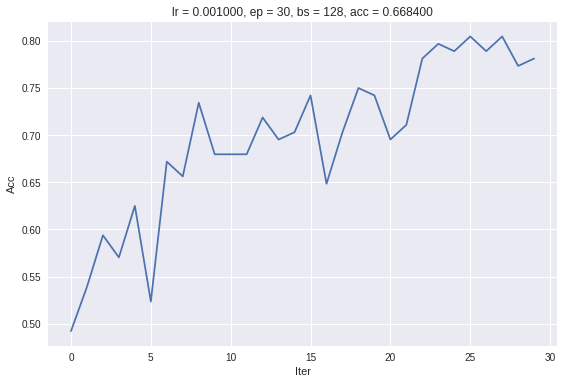

In [5]:
#参数
learning_rate = 1e-3
batch_size = 128
epoch = 30
#momentum = 0.9
#weight_decay = 0.0005

# 构建模型
x = tf.placeholder(tf.float32, [None, 3072])

# 成本函数
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32,

X_image = tf.reshape(x, [-1, 32, 32, 3])

conv1_1 = conv_layer(X_image, 64, 'conv1_1')
conv1_2 = conv_layer(conv1_1, 64, 'conv1_2')

pool1 = max_pool(conv1_2, 'pool1')

conv2_1 = conv_layer(pool1, 128, 'conv2_1')
conv2_2 = conv_layer(conv2_1, 128, 'conv2_2')
pool2 = max_pool(conv2_2, 'pool2')

conv3_1 = conv_layer(pool2, 256, 'conv3_1')
conv3_2 = conv_layer(conv3_1, 256, 'conv3_2')
conv3_3 = conv_layer(conv3_2, 256, 'conv3_3')
pool3 = max_pool(conv3_3, 'pool3')

conv4_1 = conv_layer(pool3, 512, 'conv4_1')
conv4_2 = conv_layer(conv4_1, 512, 'conv4_2')
conv4_3 = conv_layer(conv4_2, 512, 'conv4_3')
pool4 = max_pool(conv4_3, 'pool4')

conv5_1 = conv_layer(pool4, 512, 'conv5_1')
conv5_2 = conv_layer(conv5_1, 512, 'conv5_2')
conv5_3 = conv_layer(conv5_2, 512, 'conv5_3')
pool5 = max_pool(conv5_3, 'pool5')

flattened = tf.reshape(pool5, [-1, 1 * 1 * 512])
fc6 = fc_layer(flattened, 1 * 1 * 512, 4096, name = 'fc6')
dropout6 = dropout(fc6, keep_prob)

fc7 = fc_layer(dropout6, 4096, 4096, name = 'fc7')
dropout7 = dropout(fc7, keep_prob)

fc8 = fc_layer(dropout7, 4096, 10, relu = False, name = 'fc8')

y_conv = tf.nn.softmax(fc8)

#训练_评估
cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_conv, labels=y_))
#l2 = tf.add_n([tf.nn.l2_loss(var) for var in tf.trainable_variables()])
#train_step = tf.train.MomentumOptimizer(learning_rate, momentum).minimize(cross_entropy + l2 * weight_decay)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    a = []
    train_acc = 0.0
    train_loss = 0.0
    total_batch = int(X_train.shape[0] / batch_size)
    start_time = time.time()
    for i in range(epoch):
        for batch in range(total_batch):
            batch_x = X_train[batch*batch_size : (batch+1)*batch_size, :]
            batch_y = y_train[batch*batch_size : (batch+1)*batch_size, :]
            batch_loss = sess.run(train_step, feed_dict={x: batch_x, y_: batch_y, keep_prob : 0.5})
        #loss_, acc_ = sess.run([cross_entropy, accuracy],feed_dict={x: batch_x, y_: batch_y, keep_prob : 1.0})
        acc = accuracy.eval(feed_dict={x: batch_x, y_: batch_y, keep_prob : 1.0})
        a.append(acc)
        end_time = time.time()
        print("epoch = %d, train_acc = %.4f, time = %.4f"%(i, acc, (end_time - start_time)))
        #print("epoch = %d, loss = %.4f, train_acc = %.4f, time = %.4f"%(i, loss_, acc_, (end_time - start_time)))
        start_time = end_time
    print("Optimization Finished!")
    # Test
    test_acc = accuracy.eval(feed_dict={x: X_test, y_: y_test, keep_prob : 1.0})
    print("Testing Accuracy:", test_acc)
    plt.plot(a)
    plt.xlabel('Iter')
    plt.ylabel('Acc')
    plt.title('lr = %f, ep = %d, bs = %d, acc = %f' % (learning_rate, epoch , batch_size, test_acc))
    plt.tight_layout()
    plt.savefig('VGG-tf-cifar10-%s.png' % test_acc, dpi=200)
